Movie recommandation system

In [111]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('movies.csv')
df.head(n=10)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [112]:
import pandasql as psql # using sql for some exploration

h1 = """  
    with temp as (select cast(replace(VOTES,",","") as integer) as VOTES from df)
    
    select MOVIES, YEAR, GENRE,RATING, cast(replace(VOTES,",","") as integer) as VOTES
    from df
    where RATING >= (select avg(RATING) as avr_rating from df)
    and VOTES >= (select avg(VOTES) from temp)
    order by RATING desc, VOTES desc
    limit 15
    """
psql.sqldf(h1)

,MOVIES,YEAR,GENRE,RATING,VOTES
0,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.9,8813
1,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.8,5283
2,Dark,(2017–2020),"\nCrime, Drama, Mystery",9.7,20230
3,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.7,2770
4,Dexter,(2006–2013),"\nCrime, Drama, Mystery",9.6,8434
5,BoJack Horseman,(2014–2020),"\nAnimation, Comedy, Drama",9.6,4910
6,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.6,4263
7,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.6,4212
8,Anne,(2017–2019),"\nDrama, Family",9.6,2178
9,The Dragon Prince,(2018– ),"\nAnimation, Adventure, Drama",9.6,727


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


missing values analysis

In [114]:
pd.DataFrame({'Total missing values':df.isna().sum(),
              'Percentage':(df.isna().sum()/len(df))*100})

,Total missing values,Percentage
MOVIES,0,0.000000
YEAR,644,6.440644
GENRE,80,0.800080
RATING,1820,18.201820
ONE-LINE,0,0.000000
STARS,0,0.000000
VOTES,1820,18.201820
RunTime,2958,29.582958
Gross,9539,95.399540


dropping all duplicates

In [115]:
df=df.drop_duplicates()
df.head(n=10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


removing extra characters

In [116]:
df["YEAR"] = df["YEAR"].str.replace('[^0-9]','')
df["ONE-LINE"] = df["ONE-LINE"].str.strip("\n")
df["GENRE"]=df["GENRE"].str.strip("\n")

df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"Drama, Thriller",NaN,Add a Plot,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,(2021– ),"Animation, Action, Adventure",NaN,Add a Plot,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"Documentary, Sport",NaN,Add a Plot,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",NaN,Add a Plot,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


seperate stars and directors from STARS

In [117]:
df[['Director', 'Stars']] = df['STARS'].str.split('Stars:', expand=True)
df.drop("STARS", inplace=True,axis=1)
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,\n Director:\nPeter Thorwarth\n| \n,"\nPeri Baumeister, \nCarl Anton Koch, \nAlexan..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,\n \n,"\nChris Wood, \nSarah Michelle Gellar, \nLena ..."
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,NaN,\n \n,"\nAndrew Lincoln, \nNorman Reedus, \nMelissa M..."
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"414,849",23.0,NaN,\n \n,"\nJustin Roiland, \nChris Parnell, \nSpencer G..."
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",NaN,NaN,NaN,\n Director:\nMatthias Schweighöfer\n| \n,"\nMatthias Schweighöfer, \nNathalie Emmanuel, ..."
...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"Drama, Thriller",NaN,Add a Plot,NaN,NaN,NaN,\n Director:\nNicolai Rohde\n| \n,"\nFelix Klare, \nRomina Küper, \nAnna Maria Mü..."
9995,Arcane,(2021– ),"Animation, Action, Adventure",NaN,Add a Plot,NaN,NaN,NaN,\n,None
9996,Heart of Invictus,(2022– ),"Documentary, Sport",NaN,Add a Plot,NaN,NaN,NaN,\n Director:\nOrlando von Einsiedel\n| \n ...,None
9997,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",NaN,Add a Plot,NaN,NaN,NaN,\n Director:\nJovanka Vuckovic\n| \n,"\nMorgan Taylor Campbell, \nIñaki Godoy, \nRhi..."


In [118]:
df = df.replace(r'\n', '', regex=True)
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,Director:Peter Thorwarth|,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,NaN,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"414,849",23.0,NaN,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",NaN,NaN,NaN,Director:Matthias Schweighöfer|,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"Drama, Thriller",NaN,Add a Plot,NaN,NaN,NaN,Director:Nicolai Rohde|,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro..."
9995,Arcane,(2021– ),"Animation, Action, Adventure",NaN,Add a Plot,NaN,NaN,NaN,,None
9996,Heart of Invictus,(2022– ),"Documentary, Sport",NaN,Add a Plot,NaN,NaN,NaN,Director:Orlando von Einsiedel| Star:P...,None
9997,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",NaN,Add a Plot,NaN,NaN,NaN,Director:Jovanka Vuckovic|,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J..."


Data Visulization

In [119]:
import numpy as np
import matplotlib.pyplot as plt

genre based visulization

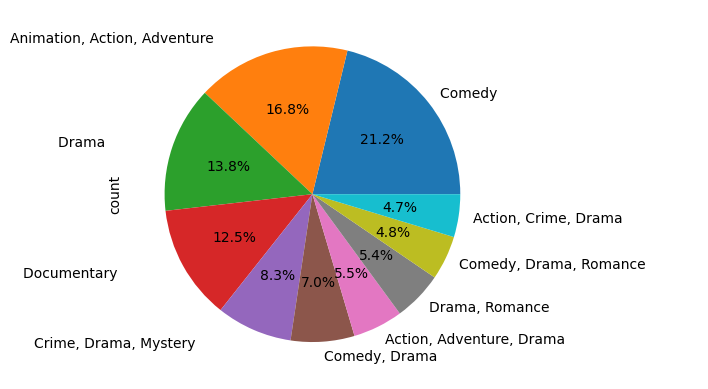

In [120]:
genre = df["GENRE"].value_counts().head(n=10).plot(kind='pie',autopct='%1.1f%%')

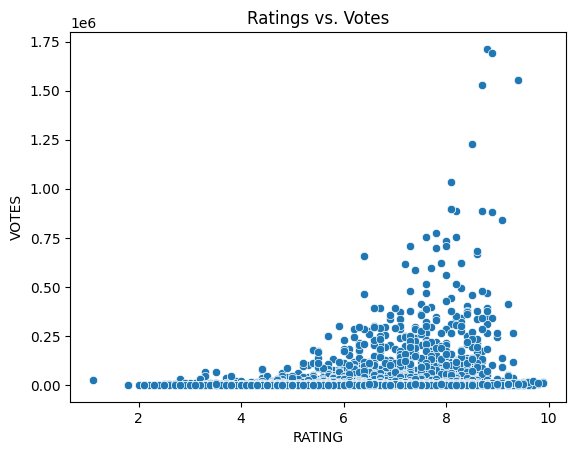

In [121]:
movies_copy = df.copy()
movies_copy.dropna(subset=['RATING', 'VOTES'], inplace=True)
movies_copy['VOTES'] = movies_copy['VOTES'].str.replace(r',', "", regex=True)
movies_copy['VOTES'] = movies_copy['VOTES'].astype(float)
sns.scatterplot(x='RATING', y='VOTES', data=movies_copy)
plt.title('Ratings vs. Votes')
plt.show()

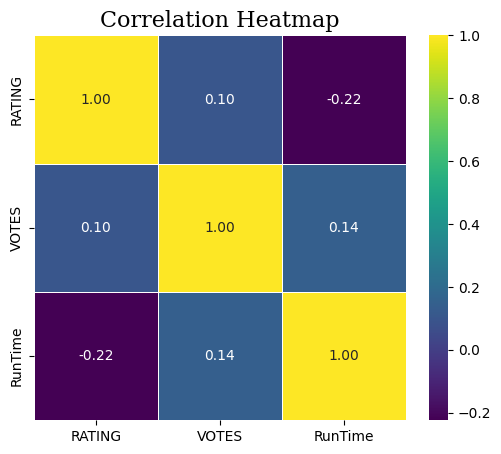

In [122]:
numerical_columns = ['RATING', 'VOTES', 'RunTime']
correlation_matrix = movies_copy[numerical_columns].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16, fontfamily='serif')
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



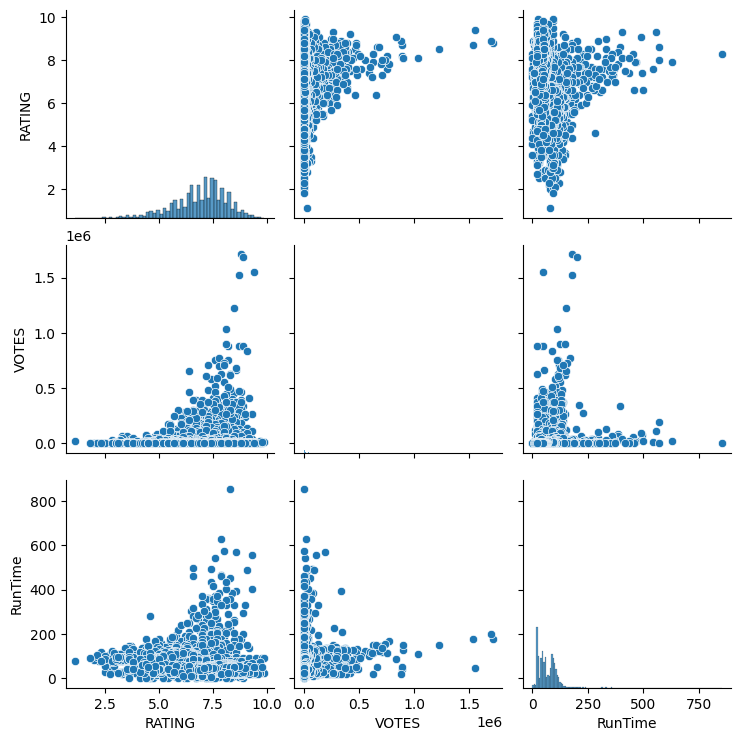

In [123]:
sns.pairplot(movies_copy)

<Axes: xlabel='GENRE'>

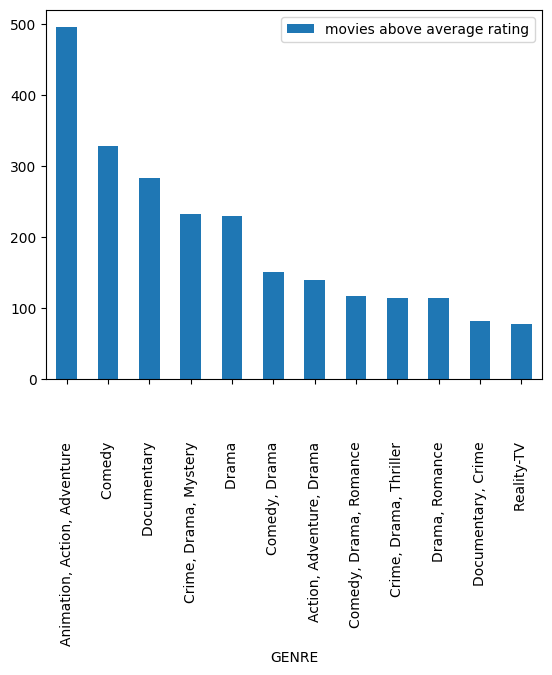

In [124]:
from pandasql import sqldf
result = sqldf('''select genre, count(genre) as num_of_movies from df where rating > 6.8 group by genre order by num_of_movies desc;''',locals())
result.head(12).plot(x='GENRE', y= 'num_of_movies',kind='bar', label = 'movies above average rating')

In [125]:
df['Year'] = df['YEAR'].str.extract(r'([0-9]{4}–.*|[0-9]{4})')
df['Year'] = df['Year'].str.strip().replace(")","")

def extract_year(year):
    if year[-3:] == '– )':
        return year.replace('– )',"–")
    else:
        return year.replace(')',"")

df['Year'] = df['Year'].fillna('Unknown')
df['Year'] = df['Year'].apply(lambda y: extract_year(y))
    
year_count = df[df['Year'] != 'Unknown']['Year'].value_counts().reset_index().rename(columns = {'Count':'Year','index':'Year'})
year_count.head()

,Year,count
0,2020–,882
1,2020,740
2,2019,657
3,2021–,561
4,2018,521


In [126]:
import plotly.express as px
colors = ['paleturquoise'] * 10
colors[0],colors[2],colors[4],colors[-1] = 'darkcyan','darkcyan','darkcyan','darkcyan'

fig = px.bar(data_frame = year_count.head(10),
             x = 'Year', y = 'count')

fig.update_traces(marker_color = colors)

fig.update_layout(title = 'Year(s) Distribution')

fig.show()

Content-based Filtering Movie Recommendation System

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

![alt text](image.png)

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

features = ['GENRE','ONE-LINE','Director','Stars']

# Filling in missing values with Blank String
for feature in features:
    df[feature] = df[feature].fillna("")

df['combined_features'] = df['GENRE'] + " " + df['ONE-LINE'] + " " + df['Director'] + " " + df['Stars']
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combined_features'])
cosine_sim = cosine_similarity(count_matrix)

In [128]:
def movie_recommendation(mov,sim_num = 5):

    user_choice = mov
    
    try:
        ref_index = df[df['MOVIES'].str.contains(user_choice, case = False)].index[0]

        similar_movies = list(enumerate(cosine_sim[ref_index]))

        sorted_simmilar_movies = sorted(similar_movies, key = lambda x: x[1], reverse = True)[1:]

        print('\nRecomended Movies for [{}]'.format(user_choice))
        print('-'*(24 + len(user_choice)))

        for i, element in enumerate(sorted_simmilar_movies):
            similar_movie_id = element[0]
            similar_movie_title = df['MOVIES'].iloc[similar_movie_id]
            s_score = element[1]
            print('{:40} -> {:.3f}'.format(similar_movie_title, s_score))

            if i > sim_num:
                break
    except IndexError:
        print("\n[{}] is not in our database!".format(user_choice))
        print("We couldn't recommend anyting...Sorry...")

In [129]:
def movie_available(key):
    
    keyword = key
    
    print("Movie with keyword: [{}]".format(keyword))
    
    for i, mov in enumerate(df[df['MOVIES'].str.contains(keyword)]['MOVIES'].to_list()):
        print("{}) {} ".format(i+1,mov))

In [130]:
movie_available("Spider")

Movie with keyword: [Spider]
1) Spider-Man: Far from Home 
2) Spider-Man 
3) The Girl in the Spider's Web 
4) Escape From Spiderhead 
5) The Spectacular Spider-Man 


In [131]:
movie_available("Blood Red Sky")

Movie with keyword: [Blood Red Sky]
1) Blood Red Sky 


In [132]:
movie_available("Dark")

Movie with keyword: [Dark]
1) Dark 
2) Resident Evil: Infinite Darkness 
3) Hold the Dark 
4) Dark Desire 
5) The Dark Crystal: Age of Resistance 
6) Super Dark Times 
7) We Summon the Darkness 
8) Dark Places 
9) Down a Dark Hall 
10) Out in the Dark 
11) Dark Tourist 
12) Shot in the Dark 
13) From the Dark 
14) Dark Summer 
15) Dark Net 
16) Trevor Noah: Afraid of the Dark 
17) A Tale Dark & Grimm 
18) A Tale Dark and Grimm 
19) The Darkest Dawn 
20) Feria: The Darkest Light 
21) Dark Power 
22) River of Darkness 
23) Trese After Dark 
24) Dark Chocolate 
25) Night on Earth: Shot in the Dark 
26) The Crystal Calls - Making the Dark Crystal: Age of Resistance 
27) Satria Heroes: Revenge of the Darkness 
28) A Tiger in the Dark: The Decadence Saga 
29) Facing Darkness 
30) Light in the Dark 
31) Hikaru Utada: Laughter in the Dark Tour 2018 
32) The Deep Mad Dark 
33) Dark Days at the Magna Carta 
34)  Dark 
35)  Dark 
36)  Dark 
37)  Dark 
38)  Dark 
39)  Dark 
40)  Dark 
41)  Dark 
4